# Table of Contents
 <p><div class="lev1 toc-item"><a href="#The-Traveling-Salesperson-Problem" data-toc-modified-id="The-Traveling-Salesperson-Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Traveling Salesperson Problem</a></div><div class="lev2 toc-item"><a href="#Data-Structures-and-DataTypes" data-toc-modified-id="Data-Structures-and-DataTypes-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Structures and DataTypes</a></div><div class="lev2 toc-item"><a href="#Import-Packages" data-toc-modified-id="Import-Packages-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Import Packages</a></div><div class="lev2 toc-item"><a href="#All-Tours-Algorithm:-alltours" data-toc-modified-id="All-Tours-Algorithm:-alltours-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>All Tours Algorithm: alltours</a></div><div class="lev2 toc-item"><a href="#Representing-Tours" data-toc-modified-id="Representing-Tours-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Representing Tours</a></div><div class="lev2 toc-item"><a href="#Representing-Points-and-Computing-distance" data-toc-modified-id="Representing-Points-and-Computing-distance-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Representing Points and Computing distance</a></div><div class="lev2 toc-item"><a href="#Generate-Sets-of-Cities" data-toc-modified-id="Generate-Sets-of-Cities-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Generate Sets of Cities</a></div><div class="lev2 toc-item"><a href="#Plotting-Tours" data-toc-modified-id="Plotting-Tours-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Plotting Tours</a></div><div class="lev2 toc-item"><a href="#All-Non-Redundant-Tours-Algorithm-(improved-alltours_tsp)" data-toc-modified-id="All-Non-Redundant-Tours-Algorithm-(improved-alltours_tsp)-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>All Non-Redundant Tours Algorithm (improved alltours_tsp)</a></div>

# The Traveling Salesperson Problem
Consider the [Traveling Salesperson Problem](http://en.wikipedia.org/wiki/Traveling_salesman_problem):
>Given a set of cities and the distances between each pair of cities, what is the shortest possible tour that visits each city exactly once, and returns to the starting city?

## Data Structures and DataTypes

- **A set of cities**: ---> ```Python's set```
- **Distance between each pair of cities**: ---> If A and B are cities, the distance between the two cities could be calculated through a function ```distance(A, B)```, or a table lookup, ```distance[A][B]```
- **City**: ---> a city could be represented by an integer ```(0, 1, 2, ..)``` used as an index into a distance table.
- **Tour**: ---> is a specified order in whichto visit the cities; Python's ```list``` or ```tuple``` datatypes work. For example, given the set of cities ```{A, B, C, D}```, a tour might be the list ```[B, A, D, C]```, which means to travel from B to A to D to C and finally back to B.
- **Shortest possible tour**: ---> the shortest tour is the one whose tour length is the minimum of all tours.
- **Tour length**: The sum of the distances between adjacent cities in the tour (including the last city back to the first city).
- **```shortest_path_finder()```**: ---> is the function that takes a set of cities as input and returns a tour as output. 

## Import Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
#matplotlib.rcParams['figure.figsize'] = (12, 15)
import random
import time
import itertools
import urllib
import csv
import functools
from statistics import mean, stdev

## All Tours Algorithm: alltours

In [2]:
def alltours_tsp(cities):
    "Generate all possible tours of the cities and choose the shortest tour."
    return shortest_tour(alltours(cities))

def shortest_tour(tours): 
    "Choose the tour with the minimum tour length."
    return min(tours, key=tour_length)

# TO DO: Data types: cities, tours, Functions: alltours, tour_length


def distance(A, B):
    "Function to calculate the distance between two points"
    return abs(A - B)

def tour_length(tour):
    "The total of distances between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) 
               for i in range(len(tour)))

# TO DO: Functions: distance, Data types: cities

## Representing Tours

- A tour starts in one city, and then visits each of the other cities in order, before returning to the start city. A natural representation of a tour is a sequence of cities. For example (1, 2, 3) could represent a tour that starts in city 1, moves to 2, then 3, and finally returns to 1.

- Now for the alltours function. If a tour is a sequence of cities, then all the tours are permutations of the set of all cities. A function to generate all permutations of a set is already provided in Python's standard itertools library module; we can use it as our implementation of alltours:

In [3]:
alltours = itertools.permutations

In [4]:
alltours

itertools.permutations

For $n$ cities there are $n!$ (that is, the factorial of n) permutations. Here's are all $3! = 6$ tours of 3 cities

In [5]:
cities = {'New-York', 'Little-Rock', 'Chicago'}

In [6]:
list(alltours(cities))

[('Chicago', 'Little-Rock', 'New-York'),
 ('Chicago', 'New-York', 'Little-Rock'),
 ('Little-Rock', 'Chicago', 'New-York'),
 ('Little-Rock', 'New-York', 'Chicago'),
 ('New-York', 'Chicago', 'Little-Rock'),
 ('New-York', 'Little-Rock', 'Chicago')]

## Representing Points and Computing distance
A city can be represented as just a two-dimensional point. But how will we represent points? Here are some choices, with their pros and cons:

- **tuple:** A point is a two-tuple of (x, y) coordinates, for example, (300, 0). 
    - Pro: Very simple. 
    - Con: doesn't distinguish Points from other two-tuples.
    
- **class:** Define a custom Point class with x and y slots. 
    - Pro: explicit, gives us p.x and p.y accessors. 
    - Con: less efficient.
    
- **complex:** Python already has the two-dimensional point as a built-in numeric data type, but in a non-obvious way: as complex numbers, which inhabit the two-dimensional (real × imaginary) plane. 
    - Pro: efficient. 
    - Con: a little confusing; doesn't distinguish Points from other complex numbers.
    
- **subclass of complex:** All the pros of complex, and eliminating the major con.

In [7]:
# Cities are represented as Points, which are a subclass of complex numbers

class Point(complex):
    x = property(lambda p: p.real)
    y = property(lambda p: p.imag)
    
City = Point


In [8]:
# Example of computing the distance between two cities.
A = City(6, 0)
B = City(0, 8)

In [9]:
print("Distance between City A and City B is: {}".format(distance(A, B)))

Distance between City A and City B is: 10.0


## Generate Sets of Cities 

- Create a function that makes a random set of n cities by calling City n times, each with different random x and y coordinates.

- Make ```Cities``` return a ```frozenset``` rather than a ```set```. A ```frozenset``` is immutable; nobody can change it once it is created. (Likewise, each city is immutable.)

In [10]:
def Cities(n, width=900, height=600, seed=1234):
    "Make a set of n cities, each with random coordinates within a (width x height) rectangle."
    random.seed(seed * n)
    return frozenset(City(random.randrange(width), random.randrange(height))
                     for c in range(n))

## Plotting Tours

- Define ```plot_tour(tour)``` to plot the cities and the tour

In [11]:
def plot_tour(tour): 
    "Plot the cities as circles and the tour as lines between them."
    plot_lines(list(tour) + [tour[0]])
    
def plot_lines(points, style='bo-'):
    "Plot lines to connect a series of points."
    plt.plot([p.x for p in points], [p.y for p in points], style)
    plt.axis('scaled'); plt.axis('off')

In [12]:
Cities(10)

frozenset({(161+107j),
           (341+251j),
           (716+382j),
           (631+550j),
           (693+295j),
           (323+505j),
           (388+122j),
           (654+78j),
           (78+570j),
           (82+388j)})

In [13]:
tour_length(alltours_tsp(Cities(10)))

2174.850590401715

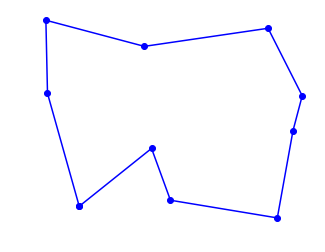

In [14]:
plot_tour(alltours_tsp(Cities(10)))

In [15]:
def plot_tsp(algorithm, cities):
    "Apply a TSP algorithm to cities, plot the resulting tour, and print information."
    # Find the solution and time how long it takes
    t0 = time.clock()
    tour = algorithm(cities)
    t1 = time.clock()
    assert valid_tour(tour, cities)
    plot_tour(tour); plt.show()
    print("{} city tour with length {:.1f} in {:.3f} secs for {}"
          .format(len(tour), tour_length(tour), t1 - t0, algorithm.__name__))
    
def valid_tour(tour, cities):
    "Is tour a valid tour for these cities?"
    return set(tour) == set(cities) and len(tour) == len(cities)

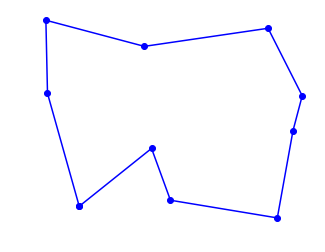

10 city tour with length 2174.9 in 21.191 secs for alltours_tsp


In [16]:
plot_tsp(alltours_tsp, Cities(10))

## All Non-Redundant Tours Algorithm (improved alltours_tsp)

In [17]:
cities = {'New-York', 'Little-Rock', 'Chicago'}
list(alltours(cities))

[('Chicago', 'Little-Rock', 'New-York'),
 ('Chicago', 'New-York', 'Little-Rock'),
 ('Little-Rock', 'Chicago', 'New-York'),
 ('Little-Rock', 'New-York', 'Chicago'),
 ('New-York', 'Chicago', 'Little-Rock'),
 ('New-York', 'Little-Rock', 'Chicago')]

For $n$ cities there are $n!$ (that is, the factorial of n) permutations. Above are all $3! = 6$ tours of 3 cities. 

But this is redundant: ```('Chicago', 'Little-Rock', 'New-York')``` , ```('Little-Rock', 'New-York', 'Chicago')```, ```('New-York', 'Chicago', 'Little-Rock')``` are three ways of describing the same tour. 

- So let's arbitrarily say that all tours must start with the first city in the set of cities. We'll just pull the first city out, and then tack it back on to all the permutations of the rest of the cities.
- While we're re-assembling a tour from the start city and the rest, we'll take the opportunity to construct the tour as a list rather than a tuple. It doesn't matter much now, but later on we will want to represent partial tours, to which we will want to append cities one by one; appending can only be done to lists, not tuples.

In [18]:
def alltours(cities):
    """Return a list of tours, each a permutation of cities, but 
    each one starting with the same city."""
    start = first(cities)
    return [[start] + Tour(rest)
           for rest in itertools.permutations(cities - {start})]

def first(collection):
    """Start iterating over collection, and return the first element
    """
    return next(iter(collection))

Tour = list  # Tours are implemented as lists of cities.

We can verify that for 3 cities there are now only 2 tours (not 6) and for 4 cities there are 6 tours (not 24):

In [19]:
list(alltours(cities))

[['Chicago', 'Little-Rock', 'New-York'],
 ['Chicago', 'New-York', 'Little-Rock']]

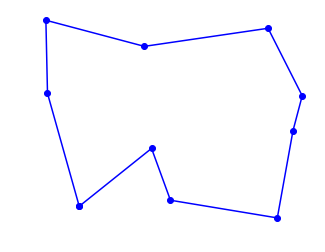

10 city tour with length 2174.9 in 2.579 secs for alltours_tsp


In [20]:
plot_tsp(alltours_tsp, Cities(10))

- ```plot_tsp(alltours_tsp, Cities(10))``` still works and gives the same tour with the same total distance. But it now runs faster